# Fashion MNIST classification

## Libraries

In [31]:
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Dataset loading

In [94]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [24]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

## Scaling

In [76]:
x_train = x_train/255
x_test = x_test/255

## ANN with Keras

In [43]:
model = Sequential()

In [44]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [45]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [78]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
callback = EarlyStopping(monitor='loss', patience=4)

In [47]:
result = model.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=20,
                   batch_size=16, 
                   callbacks=[callback],
                   verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 7s - loss: 1.8214 - accuracy: 0.4486 - val_loss: 1.3172 - val_accuracy: 0.4457
Epoch 2/20
60000/60000 - 7s - loss: 1.2388 - accuracy: 0.4922 - val_loss: 1.1309 - val_accuracy: 0.5241
Epoch 3/20
60000/60000 - 7s - loss: 1.0131 - accuracy: 0.5775 - val_loss: 1.0767 - val_accuracy: 0.5919
Epoch 4/20
60000/60000 - 7s - loss: 0.8675 - accuracy: 0.6530 - val_loss: 0.7748 - val_accuracy: 0.7029
Epoch 5/20
60000/60000 - 7s - loss: 0.7189 - accuracy: 0.7167 - val_loss: 0.7024 - val_accuracy: 0.7285
Epoch 6/20
60000/60000 - 7s - loss: 0.6012 - accuracy: 0.7684 - val_loss: 0.6350 - val_accuracy: 0.7809
Epoch 7/20
60000/60000 - 7s - loss: 0.5425 - accuracy: 0.8027 - val_loss: 0.5676 - val_accuracy: 0.7856
Epoch 8/20
60000/60000 - 7s - loss: 0.5148 - accuracy: 0.8113 - val_loss: 0.5318 - val_accuracy: 0.8094
Epoch 9/20
60000/60000 - 7s - loss: 0.5129 - accuracy: 0.8154 - val_loss: 0.5685 - val_accuracy: 0.7966
Epoch 10/20
60

In [48]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

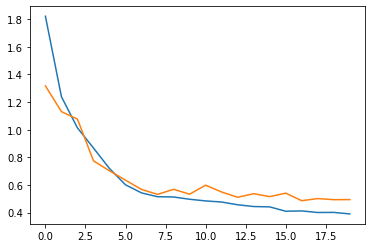

In [49]:
plt.plot(result.history['loss'], label = 'loss')
plt.plot(result.history['val_loss'], label = 'val_loss')

In [50]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.4940 - accuracy: 0.8489


[0.4940067654848099, 0.8489]

In [59]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(10000, 10)


In [60]:
y_pred = np.argmax(y_pred, axis = 1)
print(y_pred.shape)

(10000,)


In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test, y_pred))

[[853   3  25  18   2   1  95   0   3   0]
 [  0 963   1  14  11   0  10   0   1   0]
 [ 15   0 824   9  77   0  75   0   0   0]
 [ 38  18  22 821  36   0  63   0   2   0]
 [  0   0 150  31 669   0 149   0   1   0]
 [  0   0   4   0   0 915   5  54   2  20]
 [200   1 152  19  35   0 586   0   7   0]
 [  0   0   0   0   0   7   0 952   5  36]
 [  2   0  11   2   1   1  32   2 949   0]
 [  1   0   0   0   0   4   0  38   0 957]]


## CNN with Keras

In [95]:
x_train.shape[1]

28

In [98]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [73]:
# x_train = np.expand_dims(x_train,axis=1)
# x_test = np.expand_dims(x_test,axis=1)
# print(x_train.shape)
# print(x_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [99]:
input_shape = x_train[0].shape
print(input_shape)

(28, 28, 1)


In [112]:
model = Sequential()

In [113]:
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(254, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [114]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [115]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 254)              

In [116]:
callback = EarlyStopping(monitor='loss', patience=4)

In [117]:
result = model.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=20,
                   batch_size=16, 
                   callbacks=[callback],
                   verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 35s - loss: 0.7291 - accuracy: 0.8118 - val_loss: 0.3930 - val_accuracy: 0.8578
Epoch 2/20
60000/60000 - 34s - loss: 0.4125 - accuracy: 0.8559 - val_loss: 0.4188 - val_accuracy: 0.8580
Epoch 3/20
60000/60000 - 33s - loss: 0.3955 - accuracy: 0.8643 - val_loss: 0.3776 - val_accuracy: 0.8737
Epoch 4/20
60000/60000 - 33s - loss: 0.3989 - accuracy: 0.8670 - val_loss: 0.3638 - val_accuracy: 0.8791
Epoch 5/20
60000/60000 - 34s - loss: 0.3679 - accuracy: 0.8763 - val_loss: 0.3984 - val_accuracy: 0.8711
Epoch 6/20
60000/60000 - 33s - loss: 0.3670 - accuracy: 0.8737 - val_loss: 0.4636 - val_accuracy: 0.8520
Epoch 7/20
60000/60000 - 33s - loss: 0.3621 - accuracy: 0.8788 - val_loss: 0.3514 - val_accuracy: 0.8852
Epoch 8/20
60000/60000 - 34s - loss: 0.3752 - accuracy: 0.8769 - val_loss: 0.3690 - val_accuracy: 0.8806
Epoch 9/20
60000/60000 - 36s - loss: 0.3657 - accuracy: 0.8806 - val_loss: 0.4516 - val_accuracy: 0.8612
Epoch

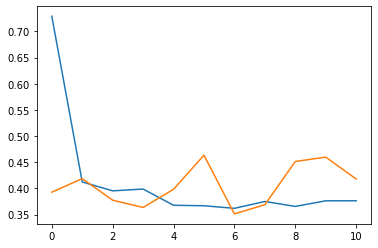

In [118]:
plt.plot(result.history['loss'], label = 'loss')
plt.plot(result.history['val_loss'], label = 'val_loss')

In [119]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 141us/sample - loss: 0.4181 - accuracy: 0.8721


[0.41811770985126495, 0.8721]

In [120]:
y_pred = model.predict(x_test)
print(y_pred.shape)


(10000, 10)


In [121]:
y_pred = np.argmax(y_pred, axis = 1)
print(y_pred.shape)

(10000,)


In [122]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[685   1  38  20   0   0 254   0   2   0]
 [  1 962   2  17   2   0  14   0   2   0]
 [  3   0 850   7  19   0 120   0   1   0]
 [  6   2  12 878  17   0  85   0   0   0]
 [  0   0 114  31 697   0 158   0   0   0]
 [  0   0   0   1   0 968   6  18   1   6]
 [ 48   0  81  20  22   0 825   0   4   0]
 [  0   0   0   0   0  13   4 966   0  17]
 [  1   0   1   3   1   3  42   3 946   0]
 [  1   0   0   0   0  10   3  42   0 944]]
